## 가위바위보 분류기 만들기

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [2]:
from PIL import Image
import glob
import os

In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

from PIL import Image
import os

image_path = os.getenv('HOME')+'/aiffel/rock_scissor_paper/scissor/0.jpg'
img = Image.open(image_path)
img.show()
ima_size = img.size
print(ima_size)

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


(28, 28)


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
#28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [6]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


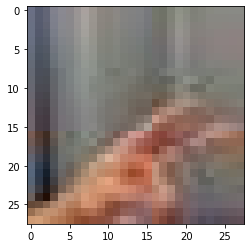

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
print('라벨: ', y_train[1])

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# model의 입력/출력부에 특히 유의해 주세요. 
#가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
#(흑백->칼라, 레이블 10->3)

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [9]:
## 딥러닝 네트워크 학습시키기
print(x_train_norm.shape, y_train.shape)
#x_train_reshaped.shape
x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=100)

(300, 28, 28, 3) (300,)
Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 2.0532 - accuracy: 0.2433
Epoch 2/100
10/10 [==============================] - 0s 20ms/step - loss: 1.2121 - accuracy: 0.3633
Epoch 3/100
10/10 [==============================] - 0s 21ms/step - loss: 1.0774 - accuracy: 0.3967
Epoch 4/100
10/10 [==============================] - 0s 21ms/step - loss: 1.0074 - accuracy: 0.4433
Epoch 5/100
10/10 [==============================] - 0s 21ms/step - loss: 0.9594 - accuracy: 0.5233
Epoch 6/100
10/10 [==============================] - 0s 21ms/step - loss: 0.8990 - accuracy: 0.6233
Epoch 7/100
10/10 [==============================] - 0s 21ms/step - loss: 0.8667 - accuracy: 0.6300
Epoch 8/100
10/10 [==============================] - 0s 20ms/step - loss: 0.8420 - accuracy: 0.6533
Epoch 9/100
10/10 [==============================] - 0s 20ms/step - loss: 0.7534 - accuracy: 0.7667
Epoch 10/100
10/10 [==============================] - 0s 25ms/step - loss: 0

In [10]:
# x_test, y_test를 만들기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
x_test_reshaped=x_test_norm.reshape(-1, 28, 28, 3)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.


In [11]:
# 학습된 model을 test 데이터에 적용함

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)


10/10 - 0s - loss: 0.0000e+00 - accuracy: 1.0000


### 평가결과: Loss는 0.0 이고, 정확도도 100% 임